### Load the results from the temp folder

In [309]:
from classes import *
from datetime import datetime
from mayors import *
import os
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

In [310]:
filename = "2020_6_5"

foldername = "temp"
subfolder = "experiments"
target = os.path.join(foldername,subfolder)

today = datetime.date(datetime.now())
date = "{}_{}_{}".format(today.year,today.month,today.day)

if not os.path.exists(foldername):
    os.mkdir(foldername)
    if not os.path.exists(target):
        os.mkdir(target)

experiments = pickle.load(open( os.path.join(target,"experiment_" + filename + ".p"), "rb") ) 
print(len(experiments))

600


In [311]:
#Just test if the output looks ok
experiment = experiments[0]
experiment

OrderedDict([('model_name', 'Rotty'),
             ('Model', Rotty 
              -----------
              allFloodProtection: 
              No 3.5; Dike 4.5;  
              -----------
              allResidentialArea: 
              Area_A Protected by:['No']
              Area_B Protected by:['Dike']
              
              Parameters : 
              {'alarming_conditions': OrderedDict([(1, ['Major flood', 40]), (0, ['Small flood', 20]), (-0.2, ['Near miss', 10]), (-0.4, ['Major wake-up', 7]), (-1, ['Minor wake-up', 5]), (-10, ['Nothing happens', 0])]), 'Gumbel': OrderedDict([('mu', 2.33), ('beta', 0.234)]), 'Bayesian_weighing_constants': OrderedDict([('a_noflood', 1), ('a_flood', 0.1), ('b_noflood', 0.04), ('b_flood', 1), ('c', 0), ('d', 0.2)]), 'I_experience_interp': {'xp': [0, 0.5], 'fp': [0, 1]}}),
             ('SurgeLevel', LeBars_2017_RCP45_05__0),
             ('Mayor', <mayors.Kroket at 0x1e3e615bfd0>)])

In [312]:
threshold = 50

results = pd.DataFrame()

for i,experiment in enumerate(experiments):
    full = experiment['SurgeLevel'].name
    #draw all the data about the sea level rise scenario
    SurgeHeight = full.split("__")[1]
    author = full.split("__")[0].split('_')[0]
    RCP = full.split("__")[0].split('_')[2]
    RCP_CI = full.split("__")[0].split('_')[3]
    
    #draw the name of the mayor
    mayor = experiment['Mayor'].get_name()
    
    #evaluate Area_A:
    #variable = experiment['Model'].allResidentialArea[0].protection_level_rp
    variable = experiment['Model'].allResidentialArea[0].trust_t
    #next(value for value in variable if value<=threshold) #this finds the value itself
    try:
        index = next(x[0] for x in enumerate(variable) if x[1] <= threshold) #this finds the index corresponding to the value
        year = experiment['SurgeLevel'].years[index]
    except:
        year = np.NaN
        #print('Condition not found')
    #print(year)
    results = results.append(pd.Series(data=[author,RCP,RCP_CI,mayor,year,SurgeHeight],index=['author','RCP','CI','Mayor','SETP_year','SurgeHeight'],name=i))
results[results.Mayor == 'Berry Kroket']

,CI,Mayor,RCP,SETP_year,SurgeHeight,author
0,05,Berry Kroket,RCP45,2088.0,0,LeBars
4,05,Berry Kroket,RCP45,NaN,1,LeBars
8,05,Berry Kroket,RCP45,2093.0,2,LeBars
12,05,Berry Kroket,RCP45,2080.0,3,LeBars
16,05,Berry Kroket,RCP45,2058.0,4,LeBars
...,...,...,...,...,...,...
580,83,Berry Kroket,RCP85,2034.0,5,SROCC
584,83,Berry Kroket,RCP85,2044.0,6,SROCC
588,83,Berry Kroket,RCP85,2049.0,7,SROCC
592,83,Berry Kroket,RCP85,2062.0,8,SROCC


In [315]:
df = results.copy()
df.head()

,CI,Mayor,RCP,SETP_year,SurgeHeight,author
0,05,Berry Kroket,RCP45,2088.0,0,LeBars
1,05,Mr. H. Economicus,RCP45,2088.0,0,LeBars
2,05,Sentiment,RCP45,2088.0,0,LeBars
3,05,Lawkeeper,RCP45,2088.0,0,LeBars
4,05,Berry Kroket,RCP45,NaN,1,LeBars


In [316]:
df['keyvalue'] = df['author'] + "_" + df['RCP'] #create a new column with a composed key
df

,CI,Mayor,RCP,SETP_year,SurgeHeight,author,keyvalue
0,05,Berry Kroket,RCP45,2088.0,0,LeBars,LeBars_RCP45
1,05,Mr. H. Economicus,RCP45,2088.0,0,LeBars,LeBars_RCP45
2,05,Sentiment,RCP45,2088.0,0,LeBars,LeBars_RCP45
3,05,Lawkeeper,RCP45,2088.0,0,LeBars,LeBars_RCP45
4,05,Berry Kroket,RCP45,NaN,1,LeBars,LeBars_RCP45
...,...,...,...,...,...,...,...
595,83,Lawkeeper,RCP85,2062.0,8,SROCC,SROCC_RCP85
596,83,Berry Kroket,RCP85,2044.0,9,SROCC,SROCC_RCP85
597,83,Mr. H. Economicus,RCP85,2044.0,9,SROCC,SROCC_RCP85
598,83,Sentiment,RCP85,2044.0,9,SROCC,SROCC_RCP85


In [317]:

mapping = OrderedDict({ #map the unique key-combinations to a y-value
    'SROCC_RCP26' : 1,
    'SROCC_RCP45' : 2,
    'SROCC_RCP85' : 3,
    'LeBars_RCP45' : 4,
    'LeBars_RCP85' : 5,
})

In [318]:
df['y-value'] = df['keyvalue'].apply(mapping.get)
df.head()

,CI,Mayor,RCP,SETP_year,SurgeHeight,author,keyvalue,y-value
0,05,Berry Kroket,RCP45,2088.0,0,LeBars,LeBars_RCP45,4
1,05,Mr. H. Economicus,RCP45,2088.0,0,LeBars,LeBars_RCP45,4
2,05,Sentiment,RCP45,2088.0,0,LeBars,LeBars_RCP45,4
3,05,Lawkeeper,RCP45,2088.0,0,LeBars,LeBars_RCP45,4
4,05,Berry Kroket,RCP45,NaN,1,LeBars,LeBars_RCP45,4


In [319]:
#for multiple conditions indexing: & and; | or; ~ not
dfA = df[(df.CI == '50') | (df.CI == 'med')] #throw the tails of the distribution away for now!
dfA.index = dfA.SETP_year

In [326]:
dfA[dfA.SurgeHeight == '5']

,CI,Mayor,RCP,SETP_year,SurgeHeight,author,keyvalue,y-value
SETP_year,,,,,,,,
2034.0,med,Berry Kroket,RCP45,2034.0,5,LeBars,LeBars_RCP45,4
2034.0,med,Mr. H. Economicus,RCP45,2034.0,5,LeBars,LeBars_RCP45,4
2034.0,med,Sentiment,RCP45,2034.0,5,LeBars,LeBars_RCP45,4
2034.0,med,Lawkeeper,RCP45,2034.0,5,LeBars,LeBars_RCP45,4
2034.0,med,Berry Kroket,RCP85,2034.0,5,LeBars,LeBars_RCP85,5
2034.0,med,Mr. H. Economicus,RCP85,2034.0,5,LeBars,LeBars_RCP85,5
2034.0,med,Sentiment,RCP85,2034.0,5,LeBars,LeBars_RCP85,5
2034.0,med,Lawkeeper,RCP85,2034.0,5,LeBars,LeBars_RCP85,5
2034.0,50,Berry Kroket,RCP26,2034.0,5,SROCC,SROCC_RCP26,1


(0.0, 1.0, 0.0, 1.0)

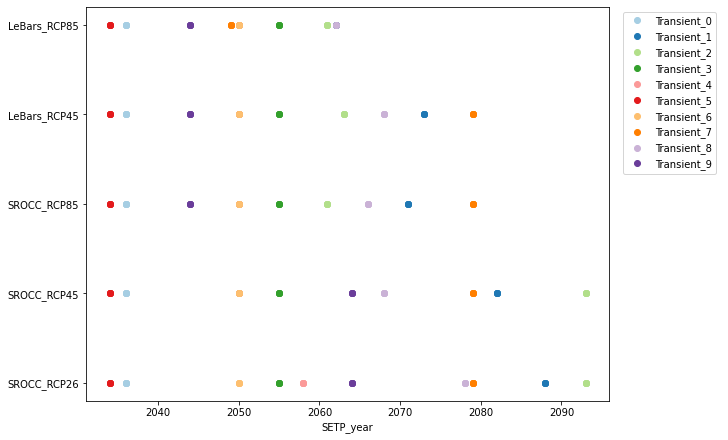

In [320]:
#fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,8),constrained_layout=True)
#PREPARE THE GRID
fig = plt.figure(constrained_layout=True,figsize=(10,6))
gs = fig.add_gridspec(1,2,width_ratios = [10,1])
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])

#PREPARE THE PLOT
keys = list(range(0,10))
keys = [str(i) for i in keys]
colors3 = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a'] #from the visualise scenarios.ipynb
SurgeHeights = dict(zip(keys,colors3))

for SH in SurgeHeights:
    dfA[dfA.SurgeHeight == SH]['y-value'].plot(ax=ax1,color=SurgeHeights[SH],marker='o',linestyle='None')

    
ax1.set_xlim()
ax1.set_yticks([mapping[key] for key in list(mapping.keys())])
ax1.set_yticklabels(list(mapping.keys()))

#PREPARE THE LEGEND
legend_elements = []
for SH in SurgeHeights:
    legend_elements.append(Line2D([0],[0],marker='o',color=SurgeHeights[SH],label='Transient_'+SH,linestyle='None'))
    
ax2.legend(handles=legend_elements)
ax2.axis('off')

In [321]:
fig.savefig(os.path.join('Visualisations','SETP_Area_A_50%trust.png'))